# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  New York State RSBS (Single Family).csv
Variables/Columns
County	
State	
Floor_Area	
Year_Built	
Site_EUI
Source_EUI
ID	
Number_of_Occupants	
Number_of_Floors

In [16]:
# Read the csv file into a pandas DataFrame

res = pd.read_csv('data/Clean Res.csv')
res = res[np.isfinite(res['Site_EUI'])]
res = res[np.isfinite(res['Source_EUI'])]
res = res[np.isfinite(res['Floor_Area'])]
res.head()

,County,State,Floor_Area,Year_Built,Site_EUI,Source_EUI,ID,Number_of_Occupants,Number_of_Floors
0,Kings,NY,2080.0,1930,88.339224,122.293096,32B6608C-126C-4866-AE8E-87516FC4E0DD,4,2.0
2,Suffolk,NY,3200.0,1985,27.280474,70.942452,3CA9DFC7-A7CD-4E7F-AE24-51F372619440,3,1.0
3,Westchester,NY,4800.0,1998,25.071247,34.277775,43B6F181-7D3D-41F9-9C35-EEFF6940F348,4,2.0
4,Nassau,NY,2900.0,1962,57.282161,113.048759,51E18DB9-1210-4EE4-817E-FDF11B906DD2,2,2.0
5,Westchester,NY,1200.0,1910,76.107013,106.892723,738318D7-E44C-49CD-8039-21A04255AE44,2,2.0


In [17]:
X = res[["Floor_Area", "County", "Year_Built","Number_of_Occupants","Number_of_Floors"]]
y = res["Site_EUI"].values.reshape(-1, 1)
print(X.shape, y.shape)

(536, 5) (536, 1)


## Dummy Encoding (Binary Encoded Data)


In [18]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data, columns=["County"])
data_binary_encoded = pd.get_dummies(data, columns=["County"])

data_binary_encoded.head()

,Floor_Area,Year_Built,Number_of_Occupants,Number_of_Floors,County_Albany,County_Allegany,County_Bronx,County_Broome,County_Cayuga,County_Chautauqua,...,County_Suffolk,County_Sullivan,County_Tioga,County_Tompkins,County_Ulster,County_Washington,County_Wayne,County_Westchester,County_Wyoming,County_Yates
0,2080.0,1930,4,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3200.0,1985,3,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4800.0,1998,4,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2900.0,1962,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,1910,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Scaling and Normalization

In [19]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Floor_Area,Year_Built,Number_of_Occupants,Number_of_Floors,County_Albany,County_Allegany,County_Bronx,County_Broome,County_Cayuga,County_Chautauqua,...,County_Suffolk,County_Sullivan,County_Tioga,County_Tompkins,County_Ulster,County_Washington,County_Wayne,County_Westchester,County_Wyoming,County_Yates
622,2280.0,1869,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
659,4006.0,1971,5,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
553,3628.0,2012,5,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,3000.0,2012,5,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2000.0,1987,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### StandardScaler

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.3416818113227035


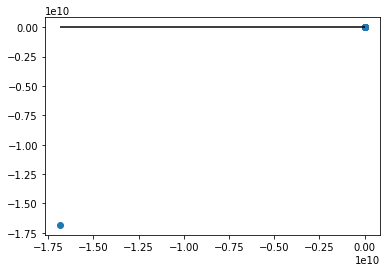

In [22]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

### Random_Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# I don't know why I should label y target. And Y target is different from y_train

In [50]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

In [51]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train.values,y_train_encoded)
rf.score(X_train.values,y_train_encoded)

1.0

In [58]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.26205428, 0.21002444, 0.13059859, 0.07237296, 0.01008338,
       0.00204403, 0.00507257, 0.00675961, 0.00360931, 0.00341302,
       0.00489197, 0.0033212 , 0.00753461, 0.00463871, 0.00332819,
       0.00386586, 0.0061518 , 0.01256903, 0.00438994, 0.00561786,
       0.00678622, 0.00347411, 0.00206999, 0.00517984, 0.00658473,
       0.00591524, 0.00195432, 0.0053458 , 0.0119187 , 0.00763954,
       0.00756825, 0.00721213, 0.00801591, 0.00968457, 0.00937918,
       0.00581449, 0.0057427 , 0.        , 0.00722709, 0.00615307,
       0.00568156, 0.00574943, 0.0070923 , 0.00493685, 0.00131175,
       0.01084253, 0.00770043, 0.00451909, 0.00191975, 0.00291748,
       0.00700996, 0.00381814, 0.00855976, 0.00218276, 0.00499351,
       0.00447854, 0.00754465, 0.00354538, 0.00605393, 0.00782147,
       0.00347674, 0.00183679])

In [56]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.26205428391773533, 'Floor_Area'),
 (0.2100244350632653, 'Year_Built'),
 (0.13059858550714515, 'Number_of_Occupants'),
 (0.07237296184346043, 'Number_of_Floors'),
 (0.012569030889419838, 'County_Erie'),
 (0.011918695381263675, 'County_Monroe'),
 (0.01084253275231817, 'County_Saratoga'),
 (0.010083384002709521, 'County_Albany'),
 (0.009684572456989986, 'County_Oneida'),
 (0.00937918330591685, 'County_Onondaga'),
 (0.008559755537256263, 'County_Suffolk'),
 (0.008015908371944326, 'County_Niagara'),
 (0.007821466442742014, 'County_Westchester'),
 (0.0077004265192287735, 'County_Schenectady'),
 (0.007639535180551306, 'County_Montgomery'),
 (0.0075682467576350596, 'County_Nassau'),
 (0.007544646413900054, 'County_Ulster'),
 (0.007534614099455241, 'County_Clinton'),
 (0.007227086019502656, 'County_Oswego'),
 (0.0072121282039649195, 'County_New York'),
 (0.007092304307503551, 'County_Rensselaer'),
 (0.007009959356981511, 'County_St. Lawrence'),
 (0.006786218636835393, 'County_Fulton'),
 (0.